# VR Thesis | Data Analysis

## Imports / Variables

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
coolors = ["#C1ABA6","#533B4D","#F564A9","#FAA4BD","#FAE3C6"]
coolors.reverse()

In [55]:
df = pd.read_csv("output.csv")
print(df.shape)
df.head(1)

(259, 44)


,How old are you?,You identify as ...,What field are you involved in?,Would you consider yourself as someone with an interest in technology?,Do you know what a Virtual Reality (VR) headset is ?,"If so, do you own a VR headset?","Based solely on this ad, what seems to be the main use for this VR headset ?","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Gaming]","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Simulation and Training]","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Productivity]",...,"Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Research and Data Visualization].1","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Education].1","Based on the ad, does this VR headset seem easy to use? [Apple]",Do you feel targeted by this ad? [Apple],Were you charmed by Meta's ad?,Were you charmed by Apple's ad?,Did those ads teach you new possibilities of VR? [Meta's ad],Did those ads teach you new possibilities of VR? [Apple's ad],"After seeing both ads, did one of them make you feel like owning a Virtual Reality headset?",How much would you be willing to spend on a Virtual Reality Headset?
0,45 - 60,Male,No Tech,4,Yes,No,Gaming,Possible,Not possible,Not possible,...,Possible,Possible,5,3,1,5,No,No,Neither,200-400 €


## Analysis

### General

In [3]:
df.info

<bound method DataFrame.info of     How old are you? You identify as ... What field are you involved in?  \
0            45 - 60                Male                        No Tech    
1            18 - 28                Male                         No Tech   
2            18 - 28                Male                         No Tech   
3            45 - 60              Female                         No Tech   
4            45 - 60                Male                         No Tech   
..               ...                 ...                             ...   
254          18 - 28              Female                    Informatique   
255          18 - 28                Male                         No Tech   
256          18 - 28                Male                    Informatique   
257          18 - 28                Male                    Informatique   
258          45 - 60                Male                         No Tech   

     Would you consider yourself as someone with an int

In [4]:
df.describe(include="all")

,How old are you?,You identify as ...,What field are you involved in?,Would you consider yourself as someone with an interest in technology?,Do you know what a Virtual Reality (VR) headset is ?,"If so, do you own a VR headset?","Based solely on this ad, what seems to be the main use for this VR headset ?","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Gaming]","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Simulation and Training]","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Productivity]",...,"Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Research and Data Visualization].1","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Education].1","Based on the ad, does this VR headset seem easy to use? [Apple]",Do you feel targeted by this ad? [Apple],Were you charmed by Meta's ad?,Were you charmed by Apple's ad?,Did those ads teach you new possibilities of VR? [Meta's ad],Did those ads teach you new possibilities of VR? [Apple's ad],"After seeing both ads, did one of them make you feel like owning a Virtual Reality headset?",How much would you be willing to spend on a Virtual Reality Headset?
count,259,259,259,259.000000,259,259,259,259,259,259,...,259,259,259.000000,259.000000,259.000000,259.000000,259,259,259,252
unique,4,2,3,NaN,1,2,3,3,3,3,...,3,3,NaN,NaN,NaN,NaN,2,2,4,12
top,18 - 28,Male,No Tech,NaN,Yes,No,Gaming,Possible,Neutral,Neutral,...,Possible,Possible,NaN,NaN,NaN,NaN,Yes,Yes,Neither,200-400 €
freq,155,154,161,NaN,259,252,210,245,105,119,...,161,98,NaN,NaN,NaN,NaN,154,175,112,70
mean,NaN,NaN,NaN,3.972973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.945946,2.918919,2.675676,3.405405,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.823141,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.869918,1.345819,1.165986,1.128270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.000000,2.000000,2.000000,3.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.000000,3.000000,3.000000,4.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.000000,4.000000,4.000000,4.000000,NaN,NaN,NaN,NaN


### Regression

In [5]:
df2 = df.copy()
replacement={"0 - 18":0,
             "18 - 28":1,
             "45 - 60":3,
             "28 - 45":2,
             "60+":4,
             "Neutral":0,
             "Not possible":0,
             "Possible":1,
             "Yes":1,
             "No":0,
             "Meta's ad":2,
             "Apple's ad":1,
             "Neither":0,
             "Both":3,
             }
df2.replace(replacement,inplace=True)

/var/folders/b5/h0kn356947gdkvw9plbj3n6h0000gp/T/ipykernel_1672/2741150178.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace(replacement,inplace=True)


In [6]:
df2.drop(columns=df2.select_dtypes(exclude=['float','int64']).columns,inplace=True)
df2.head(2)

,How old are you?,Would you consider yourself as someone with an interest in technology?,Do you know what a Virtual Reality (VR) headset is ?,"If so, do you own a VR headset?","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Gaming]","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Simulation and Training]","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Productivity]","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Therapy and Rehabilitation]","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Virtual Tourism and Exploration]","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Architecture and Design]",...,"Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Art and Creativity].1","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Research and Data Visualization].1","Once again based solely on this ad, what other actitivties seem accomplishable with this headset? [Education].1","Based on the ad, does this VR headset seem easy to use? [Apple]",Do you feel targeted by this ad? [Apple],Were you charmed by Meta's ad?,Were you charmed by Apple's ad?,Did those ads teach you new possibilities of VR? [Meta's ad],Did those ads teach you new possibilities of VR? [Apple's ad],"After seeing both ads, did one of them make you feel like owning a Virtual Reality headset?"
0,3,4,1,0,1,0,0,0,1,0,...,1,1,1,5,3,1,5,0,0,0
1,1,5,1,0,1,0,0,0,0,0,...,1,1,1,4,5,2,4,1,1,2


In [7]:
cols_to_drop = df2.columns[df2.columns.str.contains('Once again')]
df2.drop(cols_to_drop, axis=1, inplace=True)
df2.head(2)

,How old are you?,Would you consider yourself as someone with an interest in technology?,Do you know what a Virtual Reality (VR) headset is ?,"If so, do you own a VR headset?","Based on the ad, does this VR headset seem easy to use? [Meta]",Do you feel targeted by this ad? [Meta],"Based on the ad, does this VR headset seem easy to use? [Apple]",Do you feel targeted by this ad? [Apple],Were you charmed by Meta's ad?,Were you charmed by Apple's ad?,Did those ads teach you new possibilities of VR? [Meta's ad],Did those ads teach you new possibilities of VR? [Apple's ad],"After seeing both ads, did one of them make you feel like owning a Virtual Reality headset?"
0,3,4,1,0,5,1,5,3,1,5,0,0,0
1,1,5,1,0,4,3,4,5,2,4,1,1,2


<Axes: >

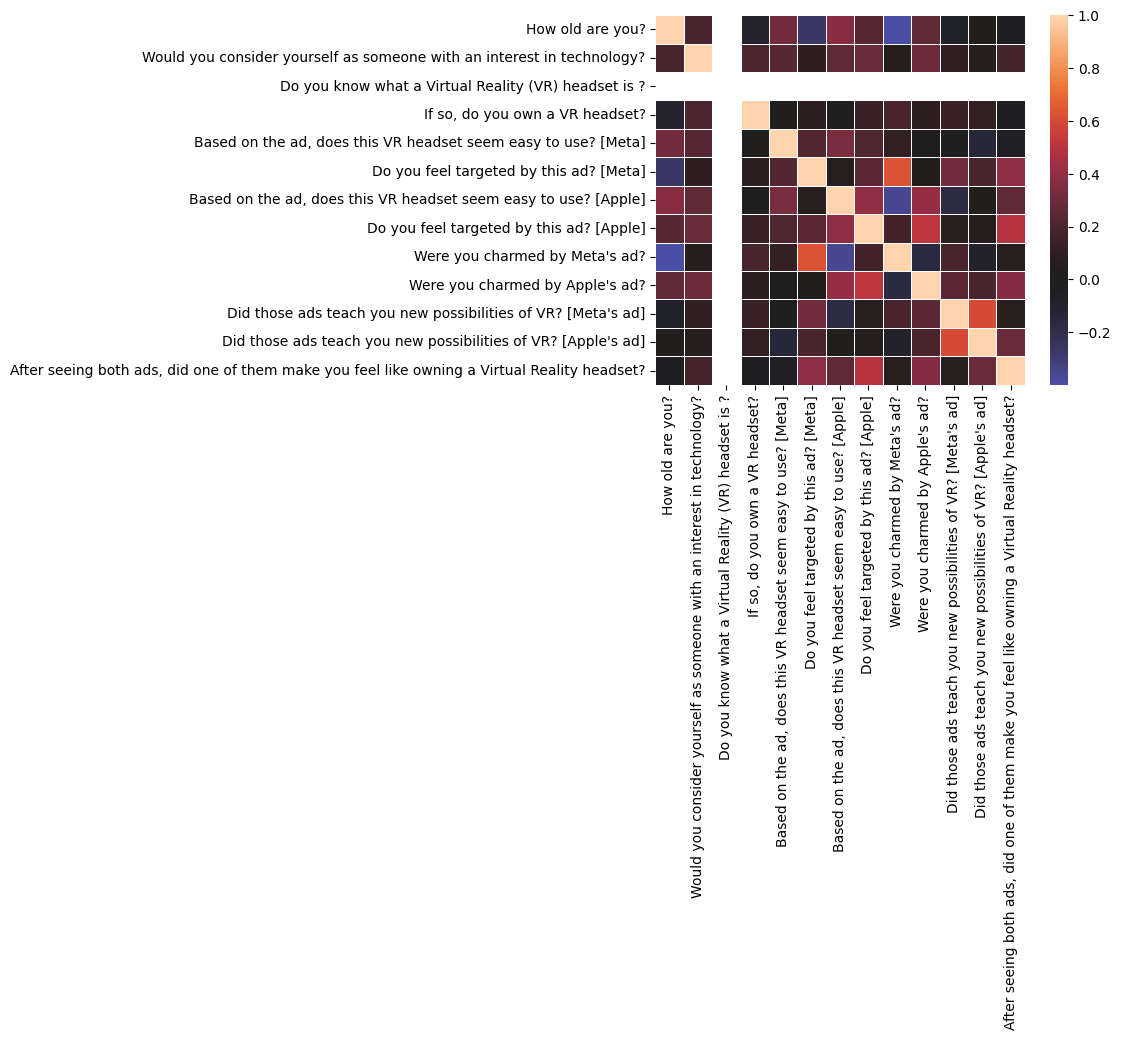

In [8]:
sns.heatmap(df2.corr(),center=0,square=True, linewidths=.5)

### Pie chart - Gender

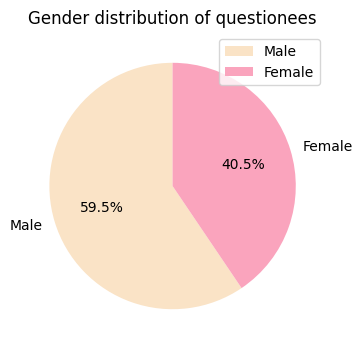

In [27]:
plt.figure(figsize=(4, 4))  # Adjust the figure size if needed
wedges, texts, autotexts = plt.pie(df.iloc[:, 1].value_counts(), 
        labels=df.iloc[:, 1].value_counts().index,
        colors=coolors,
        autopct='%1.1f%%', 
        startangle=90)
plt.legend(df.iloc[:, 1].value_counts().index)
plt.title("Gender distribution of questionees")
plt.show()

### Pie Chart - Age

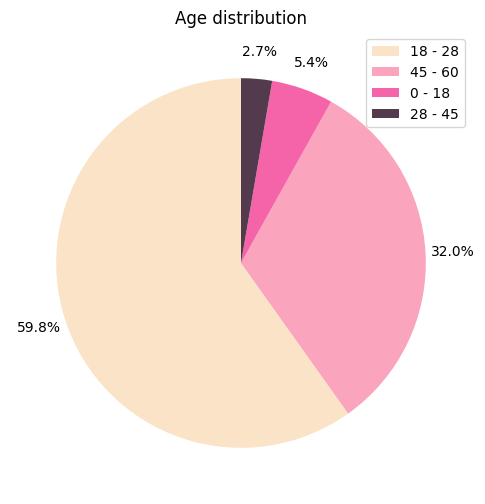

In [56]:
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
wedges, texts, autotexts = plt.pie(df.iloc[:, 0].value_counts(), 
        colors=coolors,
        autopct='%1.1f%%', 
        pctdistance=1.15,
        startangle=90)
plt.legend(df.iloc[:, 0].value_counts().index)
plt.title("Age distribution")
plt.show()

### Pie Chart - Tech

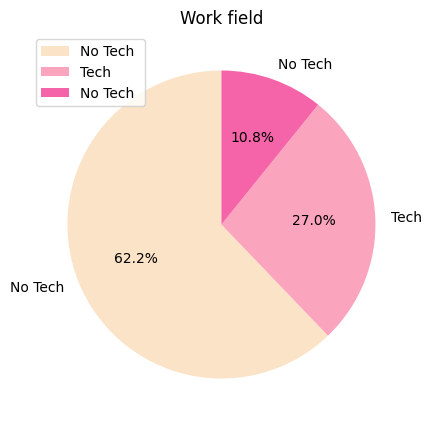

In [57]:
plt.figure(figsize=(5, 5))  # Adjust the figure size if needed
wedges, texts, autotexts = plt.pie(df.iloc[:, 2].value_counts(), 
        labels=df.iloc[:, 2].value_counts().index,
        autopct='%1.1f%%', 
        colors=coolors,
        startangle=90)
plt.legend(df.iloc[:, 2].value_counts().index)
plt.title("Work field")
plt.show()